<a href="https://colab.research.google.com/github/avyay10/Resources-for-SeSiGAN/blob/main/ShivanshAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras import backend as K
import shutil
import glob
import re

In [ ]:
No_brain_tumor = '/content/drive/MyDrive/DATASET/no'
Yes_brain_tumor = '/content/drive/MyDrive/DATASET/yes'

In [ ]:
dirlist=[No_brain_tumor, Yes_brain_tumor]
# ['brain_tumor_dataset/no/', 'brain_tumor_dataset/yes/']
classes=['No', 'Yes']
filepaths=[]
labels=[]
for i,j in zip(dirlist, classes):
# i
# ../input/brain-mri-images-for-brain-tumor-detection/no/
# ../input/brain-mri-images-for-brain-tumor-detection/yes/
# j
# No
# Yes

    filelist=os.listdir(i)
    print(filelist)
    print('\n')
# os.listdir --> returns a list containing the names of the entries in the directory given by path.
    for f in filelist:
        filepath=os.path.join (i,f)
# os.path.join('brain_tumor_dataset/no/','1 no.jpeg;)
# brain_tumor_dataset/no/1 no.jpeg
        filepaths.append(filepath)
# store the path into empty list called filepaths
        labels.append(j)
    print(filepaths)
    print('\n')
    print(labels)
    print('\n')
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

['19 no.jpg', '18 no.jpg', '14 no.jpg', '12 no.jpg', '17 no.jpg', '13 no.jpg', '11 no.jpg', '15 no.jpg', '10 no.jpg', '1 no.jpeg', 'N19.JPG', 'N17.jpg', 'N16.jpg', 'N15.jpg', 'N11.jpg', '9 no.jpg', 'N1.JPG', '8 no.jpg', '6 no.jpg', '7 no.jpg', '50 no.jpg', '49 no.jpg', '48 no.jpeg', '5 no.jpg', '47 no.jpg', '46 no.jpg', '45 no.jpg', '44no.jpg', '39 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '4 no.jpg', '43 no.jpg', '38 no.jpg', '37 no.jpg', '35 no.jpg', '34 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '29 no.jpg', '36 no.jpg', '33 no.jpg', '3 no.jpg', '24 no.jpg', '27 no.jpg', '23 no.jpg', '25 no.jpg', '26 no.jpg', '28 no.jpg', '22 no.jpg', '21 no.jpg', '20 no.jpg', '2 no.jpeg', 'No19.jpg', 'No18.jpg', 'No17.jpg', 'No16.jpg', 'No15.jpg', 'No12.jpg', 'No14.jpg', 'No13.jpg', 'No11.jpg', 'no.jpg', 'no 99.jpg', 'no 98.jpg', 'no 97.jpg', 'no 96.jpg', 'no 95.jpg', 'no 90.jpg', 'no 9.png', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no 91.jpeg', 'no 89.jpg', 'no 8.jpg', 'no 7.jpeg', 'no 

In [ ]:
Files=pd.Series(filepaths, name='filepaths')
Label=pd.Series(labels, name='labels')
df=pd.concat([Files,Label], axis=1)
# df=pd.DataFrame(np.array(df).reshape(253,2), columns = ['filepaths', 'labels'])
# df.head()
df

,filepaths,labels
0,/content/drive/MyDrive/DATASET/no/19 no.jpg,No
1,/content/drive/MyDrive/DATASET/no/18 no.jpg,No
2,/content/drive/MyDrive/DATASET/no/14 no.jpg,No
3,/content/drive/MyDrive/DATASET/no/12 no.jpg,No
4,/content/drive/MyDrive/DATASET/no/17 no.jpg,No
...,...,...
248,/content/drive/MyDrive/DATASET/yes/Y9.jpg,Yes
249,/content/drive/MyDrive/DATASET/yes/Y89.JPG,Yes
250,/content/drive/MyDrive/DATASET/yes/Y82.jpg,Yes
251,/content/drive/MyDrive/DATASET/yes/Y86.JPG,Yes


In [ ]:
df['labels']=pd.get_dummies(df['labels'])

In [ ]:
df

,filepaths,labels
0,/content/drive/MyDrive/DATASET/no/19 no.jpg,1
1,/content/drive/MyDrive/DATASET/no/18 no.jpg,1
2,/content/drive/MyDrive/DATASET/no/14 no.jpg,1
3,/content/drive/MyDrive/DATASET/no/12 no.jpg,1
4,/content/drive/MyDrive/DATASET/no/17 no.jpg,1
...,...,...
248,/content/drive/MyDrive/DATASET/yes/Y9.jpg,0
249,/content/drive/MyDrive/DATASET/yes/Y89.JPG,0
250,/content/drive/MyDrive/DATASET/yes/Y82.jpg,0
251,/content/drive/MyDrive/DATASET/yes/Y86.JPG,0


<Figure size 288x288 with 0 Axes>

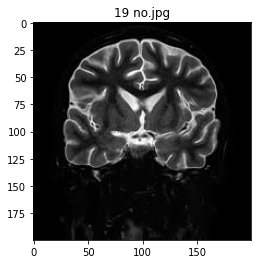

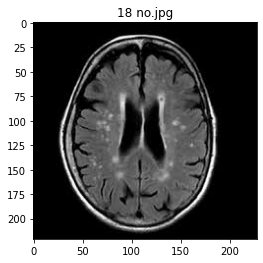

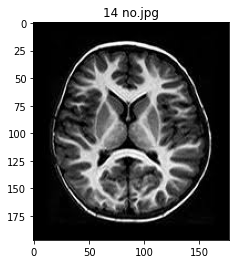

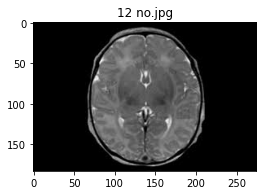

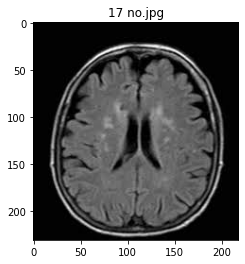

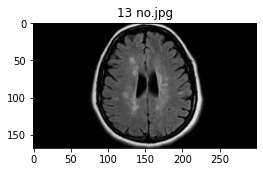

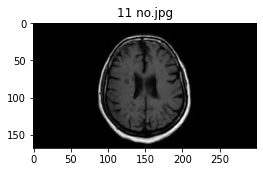

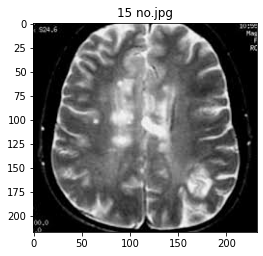

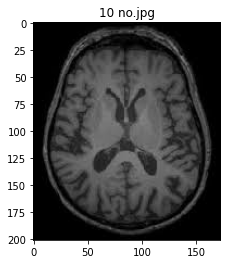

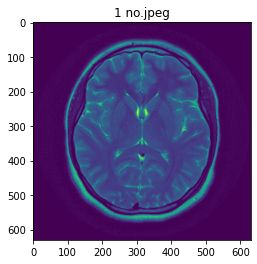

In [ ]:
plt.figure(figsize=(4,4))
for i in range(0,10):
    fig, ax = plt.subplots(figsize=(4,4))
    img = mpimg.imread(df['filepaths'][i])
    img_name = re.sub(r'^\D+','',df['filepaths'][i])
    ax.imshow(img)
    ax.set_title(img_name)

In [ ]:
from PIL import Image
widths = []
heights = []
for idx, row in df.iterrows():
    path = row['filepaths']
#   print(path)
# brain_tumor_dataset/no/1 no.jpeg
# brain_tumor_dataset/no/10 no.jpg
# brain_tumor_dataset/no/11 no.jpg
# brain_tumor_dataset/no/12 no.jpg
# brain_tumor_dataset/no/13 no.jpg
# brain_tumor_dataset/no/14 no.jpg
    im = Image.open(path)
    
#     print(im)
# <PIL.JpegImagePlugin.JpegImageFile image mode=L size=630x630 at 0x1888E54F7C0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=173x201 at 0x1888E59BFA0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x1888E540340>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x1888D29BFA0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=300x168 at 0x1888E540C70>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=177x197 at 0x1888E5317F0>
# <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=232x217 at 0x1888E540C70>
#     print(im.size)
# (630, 630)
# (173, 201)
# (300, 168)
# (275, 183)
# (300, 168)
    width, height = im.size
    widths.append(width)
    heights.append(height)
avg_width = int(sum(widths) / len(widths))
avg_height = int(sum(heights) / len(heights))
print(avg_width, avg_height)

354 386


In [ ]:
from keras.preprocessing.image import load_img

# Image Resize Function
def load_resize_color_image(path):
    # load image and resize to 300x300
    image = load_img(path,target_size=(300,300))
    return image

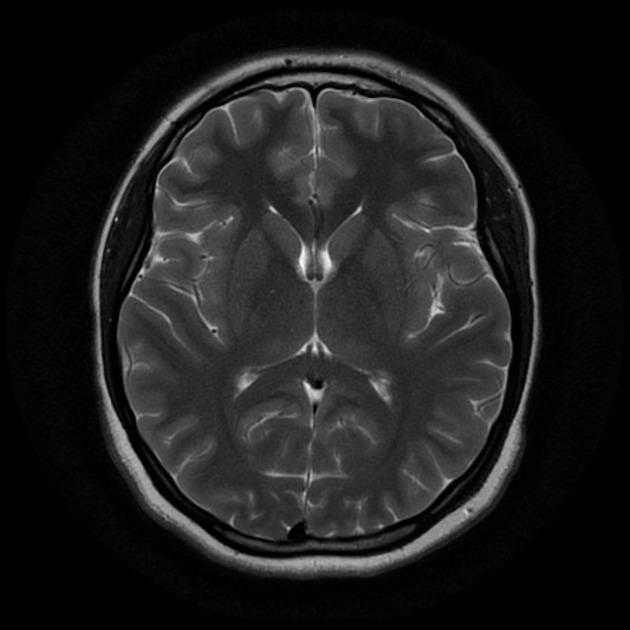

In [ ]:
load_img('/content/drive/MyDrive/DATASET/no/1 no.jpeg')

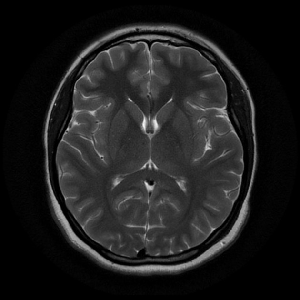

In [ ]:
load_img('/content/drive/MyDrive/DATASET/no/1 no.jpeg',target_size=(300,300))

In [ ]:
image_list =[]
cancer_list =[]
from keras.preprocessing.image import img_to_array
for idx, row in df.iterrows():
    path = row['filepaths']
    cancer = row['labels']
#   print(path)
#   print(cancer)
# brain_tumor_dataset/no/1 no.jpeg
# No
# brain_tumor_dataset/no/10 no.jpg
# No
    image = load_resize_color_image(path)
    # turn image to array
    image_array = img_to_array(image)   
    image_list.append(image_array)
    cancer_list.append(cancer)

In [ ]:
print(image_list[0:5])

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [

In [ ]:
print(cancer_list[0:5])

[1, 1, 1, 1, 1]


In [ ]:
from sklearn.utils import shuffle
image_list, cancer_list = shuffle(image_list, cancer_list)

In [ ]:
X_data = np.array(image_list)
y_data = np.array(cancer_list)

In [ ]:
print(X_data.shape)
print(y_data.shape)

(253, 300, 300, 3)
(253,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.8, random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(202, 300, 300, 3)
(202,)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_test.shape)
print(y_test.shape)

(51, 300, 300, 3)
(51,)


In [ ]:
epochs = 10
batch_size = 10
input_shape = (300,300,3)

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# ANN structure
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss="binary_crossentropy",
              optimizer='Adam',
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 49s 2s/step - loss: 0.6481 - accuracy: 0.6980 - val_loss: 0.5614 - val_accuracy: 0.7059
Epoch 2/10
21/21 [==============================] - 48s 2s/step - loss: 0.5454 - accuracy: 0.7426 - val_loss: 0.5824 - val_accuracy: 0.7451
Epoch 3/10
21/21 [==============================] - 48s 2s/step - loss: 0.4420 - accuracy: 0.8465 - val_loss: 0.5735 - val_accuracy: 0.7255
Epoch 4/10
21/21 [==============================] - 48s 2s/step - loss: 0.3728 - accuracy: 0.8812 - val_loss: 0.9829 - val_accuracy: 0.7647
Epoch 5/10
21/21 [==============================] - 48s 2s/step - loss: 0.3143 - accuracy: 0.9109 - val_loss: 0.8890 - val_accuracy: 0.7451
Epoch 6/10
21/21 [==============================] - 48s 2s/step - loss: 0.1964 - accuracy: 0.9158 - val_loss: 0.7695 - val_accuracy: 0.6863
Epoch 7/10
21/21 [==============================] - 48s 2s/step - loss: 0.1361 - accuracy: 0.9604 - val_loss: 0.9515 - val_accuracy: 0.8039
Epoch 8/10
21/21 [==

Test loss: 0.8622459173202515
Test accuracy: 0.8235294222831726


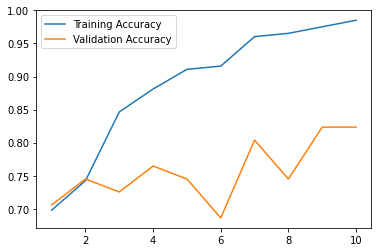

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()
